Imports

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [32]:
sat_df = pd.read_csv('../data/database.csv')

In [33]:
sat_df.T

,0,1,2,3,4,5,6,7,8,9,...,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419
Official Name of Satellite,AAUSat-4,ABS-2,ABS-2A,ABS-3,ABS-3A,ABS-4,ABS-6,ABS-7,USA 139,USA 171,...,Zhongxing 12,Zhongxing 1A,Zhongxing 20A,Zhongxing 22A,Zhongxing 2A,Zhongxing 9,Zijing 1,Ziyuan 1-02C,Ziyuan 3,Ziyan 3-2
Country/Organization of UN Registry,NR,NR,NR,Philippines,NR,NR,NR,South Korea,USA,USA,...,China/Sri Lanka,China,China,China,China,China,NR,China,China,NR
Operator/Owner,University of Aalborg,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,National Reconnaissance Office (NRO),National Reconnaissance Office (NRO),...,China Satellite Communication Corp. (China Sat...,People's Liberation Army (C41),People's Liberation Army (C41),China Satellite Communication Corp. (China Sat...,People's Liberation Army (C41),China Satellite Communication Corp. (China Sat...,Tsinghua University,China Centre for Resources Satellite Data and ...,China Centre for Resources Satellite Data and ...,China Centre for Resources Satellite Data and ...
Country of Operator/Owner,Denmark,Multinational,Multinational,Multinational,Multinational,Multinational,Multinational,Multinational,USA,USA,...,China,China,China,China,China,China,China,China,China,China
Users,Civil,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Commercial,Military,Military,...,Government,Military,Military,Military,Military/Government,Government,Civil,Government,Government,Government
Purpose,Earth Observation,Communications,Communications,Communications,Communications,Communications,Communications,Communications,Earth Observation,Earth Observation,...,Communications,Communications,Communications,Communications,Communications,Communications,Technology Development,Earth Observation,Earth Observation,Earth Observation
Detailed Purpose,Automatic Identification System (AIS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electronic Intelligence,Electronic Intelligence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Optical Imaging,Optical Imaging,Optical Imaging
Class of Orbit,LEO,GEO,GEO,GEO,GEO,GEO,GEO,GEO,GEO,GEO,...,GEO,GEO,GEO,GEO,GEO,GEO,LEO,LEO,LEO,LEO
Type of Orbit,Sun-Synchronous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sun-Synchronous,Sun-Synchronous,Sun-Synchronous,Sun-Synchronous
Longitude of Geosynchronous Orbit (Degrees),0.0,75.0,-75.0,146.06,-3.0,75.0,159.0,116.18,-14.5,95.4,...,87.5,129.84,130.0,103.28,98.0,92.22,0.0,0.0,0.0,0.0


In [34]:
sat_df.describe()

,Longitude of Geosynchronous Orbit (Degrees),Perigee (Kilometers),Apogee (Kilometers),Eccentricity,Inclination (Degrees),NORAD Number
count,1402.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000
mean,5.786598,14604.973221,16532.527837,0.020815,50.278703,34574.525722
std,53.973571,16550.261760,22155.693096,0.112768,41.841954,6087.083306
min,-177.120000,200.000000,322.000000,0.000000,0.000000,7530.000000
25%,0.000000,621.000000,687.000000,0.000210,0.090000,28377.000000
50%,0.000000,1357.000000,1415.000000,0.000534,54.970000,37234.000000
75%,0.000000,35770.000000,35795.000000,0.001580,97.460000,40022.000000
max,328.500000,62200.000000,330000.000000,0.957000,143.400000,41634.000000


In [35]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Official Name of Satellite                   1420 non-null   object 
 1   Country/Organization of UN Registry          1420 non-null   object 
 2   Operator/Owner                               1419 non-null   object 
 3   Country of Operator/Owner                    1420 non-null   object 
 4   Users                                        1419 non-null   object 
 5   Purpose                                      1419 non-null   object 
 6   Detailed Purpose                             369 non-null    object 
 7   Class of Orbit                               1419 non-null   object 
 8   Type of Orbit                                899 non-null    object 
 9   Longitude of Geosynchronous Orbit (Degrees)  1402 non-null   float64
 10  

In [36]:
sat_df.isnull().sum()

Official Name of Satellite                        0
Country/Organization of UN Registry               0
Operator/Owner                                    1
Country of Operator/Owner                         0
Users                                             1
Purpose                                           1
Detailed Purpose                               1051
Class of Orbit                                    1
Type of Orbit                                   521
Longitude of Geosynchronous Orbit (Degrees)      18
Perigee (Kilometers)                              1
Apogee (Kilometers)                               1
Eccentricity                                      1
Inclination (Degrees)                             1
Period (Minutes)                                  3
Launch Mass (Kilograms)                         103
Dry Mass (Kilograms)                            947
Power (Watts)                                   771
Date of Launch                                    4
Expected Lif

In [37]:
sat_df.isnull().value_counts()

Official Name of Satellite  Country/Organization of UN Registry  Operator/Owner  Country of Operator/Owner  Users  Purpose  Detailed Purpose  Class of Orbit  Type of Orbit  Longitude of Geosynchronous Orbit (Degrees)  Perigee (Kilometers)  Apogee (Kilometers)  Eccentricity  Inclination (Degrees)  Period (Minutes)  Launch Mass (Kilograms)  Dry Mass (Kilograms)  Power (Watts)  Date of Launch  Expected Lifetime (Years)  Contractor  Country of Contractor  Launch Site  Launch Vehicle  COSPAR Number  NORAD Number
False                       False                                False           False                      False  False    True              False           True           False                                        False                 False                False         False                  False             False                    False                 False          False           False                      False       False                  False        False           Fa

In [38]:
sat_df.dropna(subset=["Expected Lifetime (Years)"], inplace=True)

In [39]:
sat_df.isnull().sum()

Official Name of Satellite                       0
Country/Organization of UN Registry              0
Operator/Owner                                   0
Country of Operator/Owner                        0
Users                                            0
Purpose                                          0
Detailed Purpose                               794
Class of Orbit                                   0
Type of Orbit                                  448
Longitude of Geosynchronous Orbit (Degrees)     10
Perigee (Kilometers)                             0
Apogee (Kilometers)                              0
Eccentricity                                     0
Inclination (Degrees)                            0
Period (Minutes)                                 0
Launch Mass (Kilograms)                         22
Dry Mass (Kilograms)                           546
Power (Watts)                                  367
Date of Launch                                   0
Expected Lifetime (Years)      

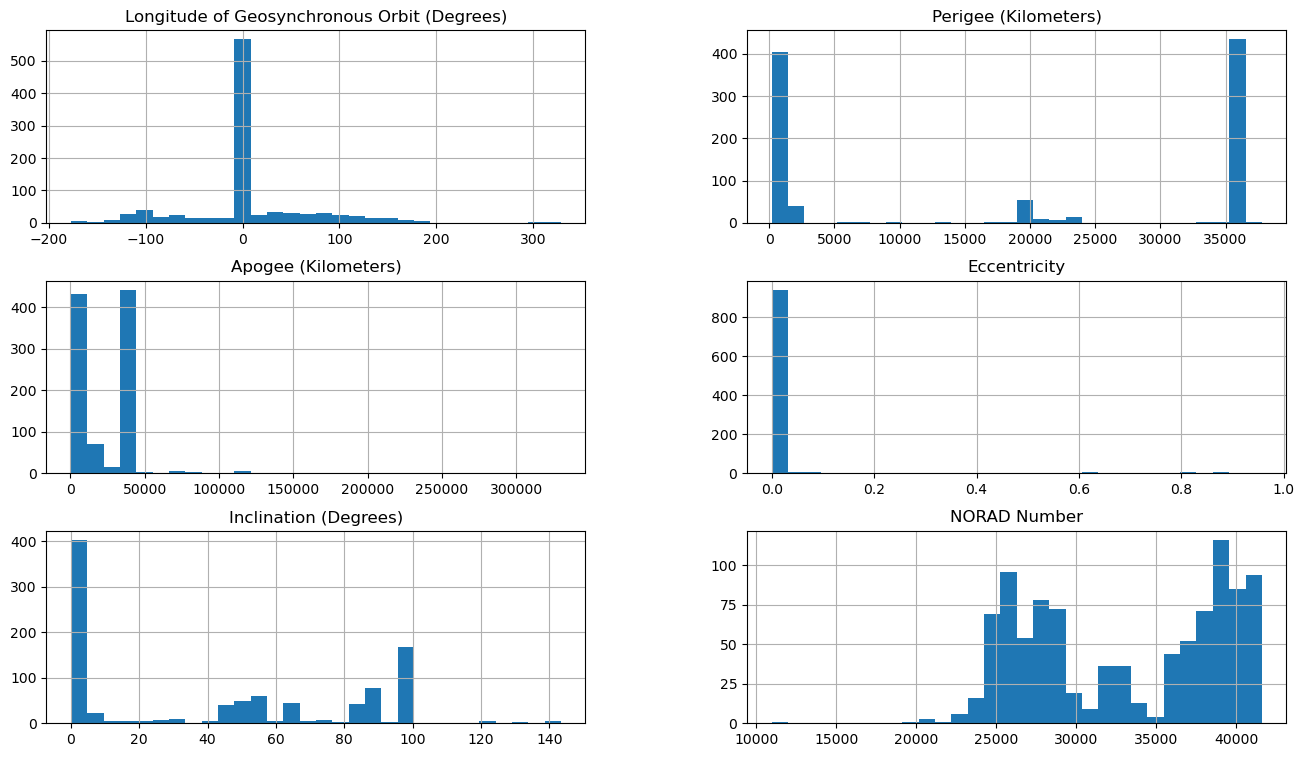

In [40]:
sat_df.hist(bins=30,figsize=(16,9))
plt.show()

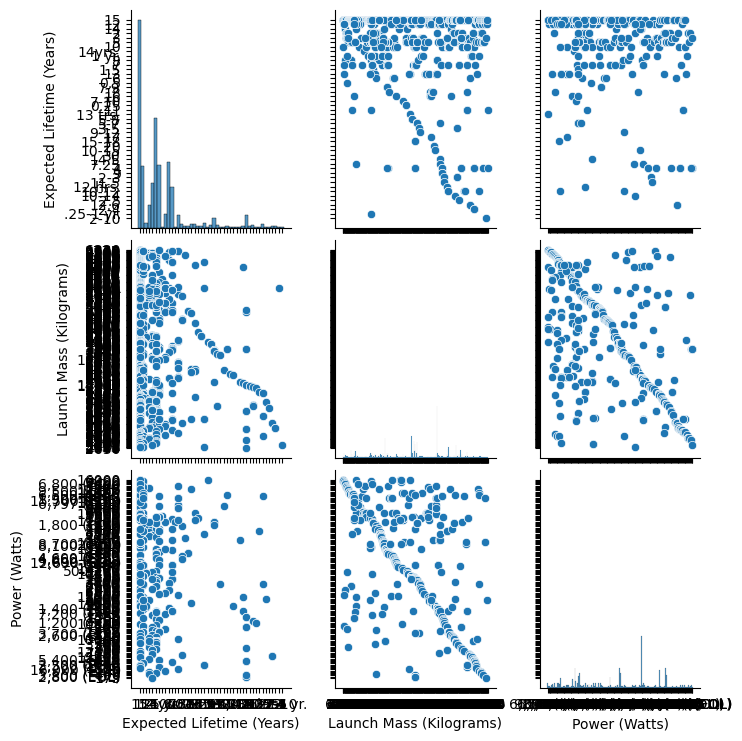

In [41]:
sns.pairplot(sat_df, vars=["Expected Lifetime (Years)", "Launch Mass (Kilograms)", "Power (Watts)"])
plt.show()

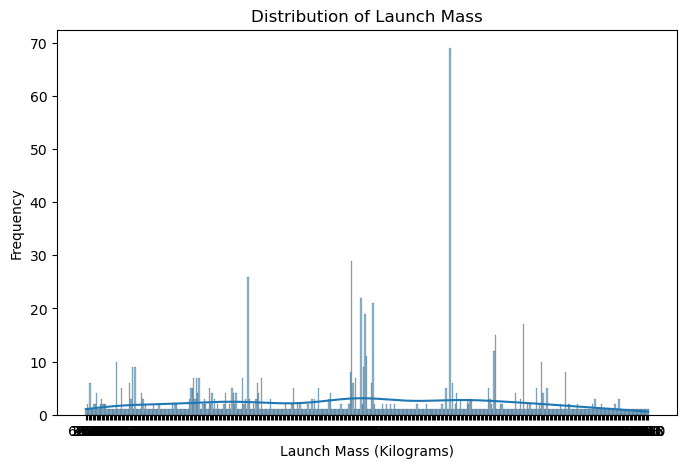

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(sat_df["Launch Mass (Kilograms)"], bins=20, kde=True)
plt.xlabel("Launch Mass (Kilograms)")
plt.ylabel("Frequency")
plt.title("Distribution of Launch Mass")
plt.show()

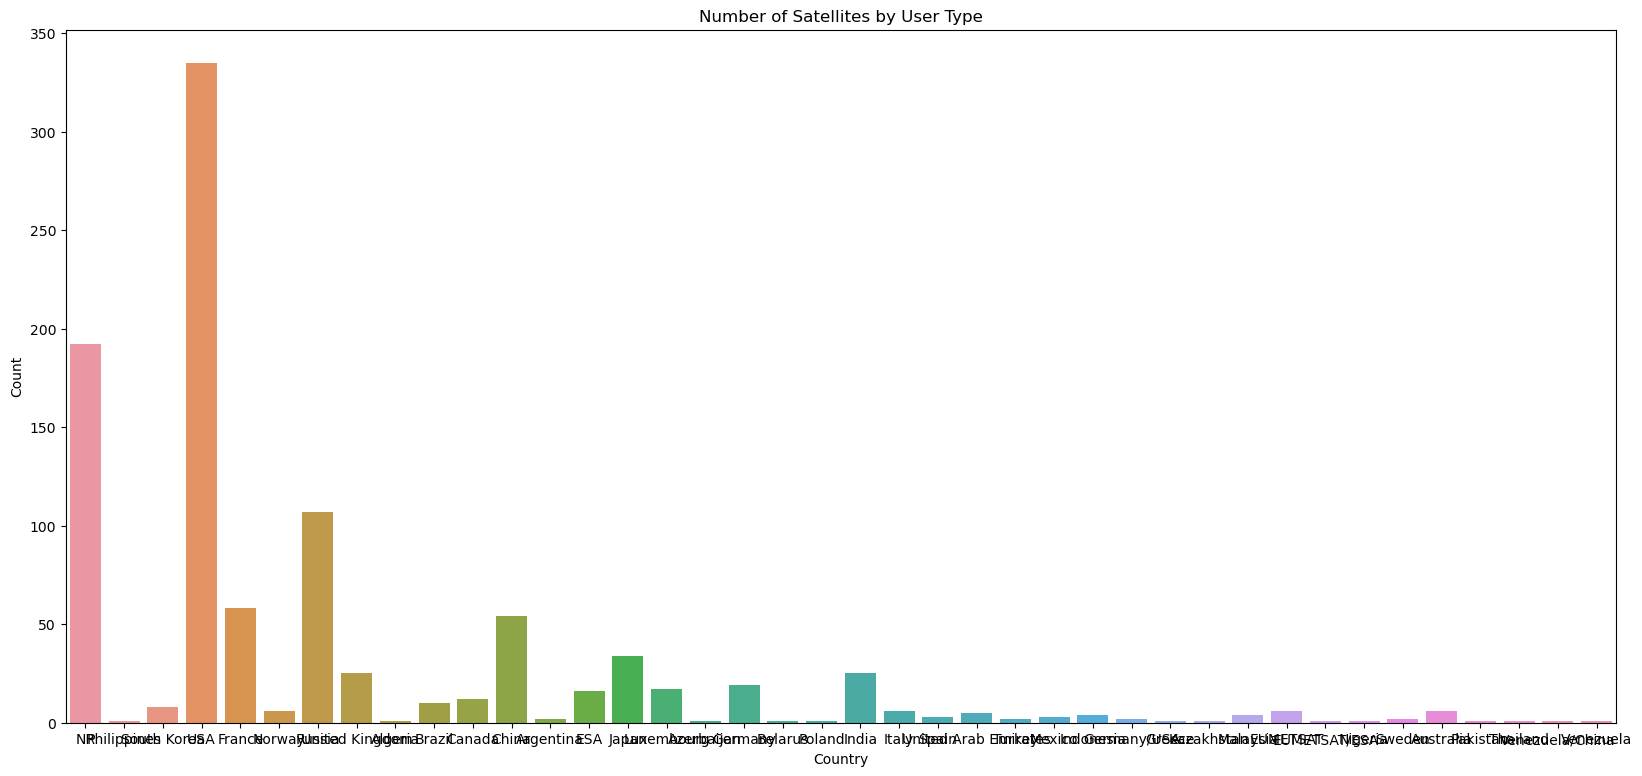

In [43]:
#Would change this to show top 10 only if I choose this dataset
plt.figure(figsize=(20, 9))
sns.countplot(x="Country/Organization of UN Registry", data=sat_df)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Number of Satellites by User Type")
plt.show()

C:\Users\joshy\AppData\Local\Temp\ipykernel_12216\2818007933.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sat_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


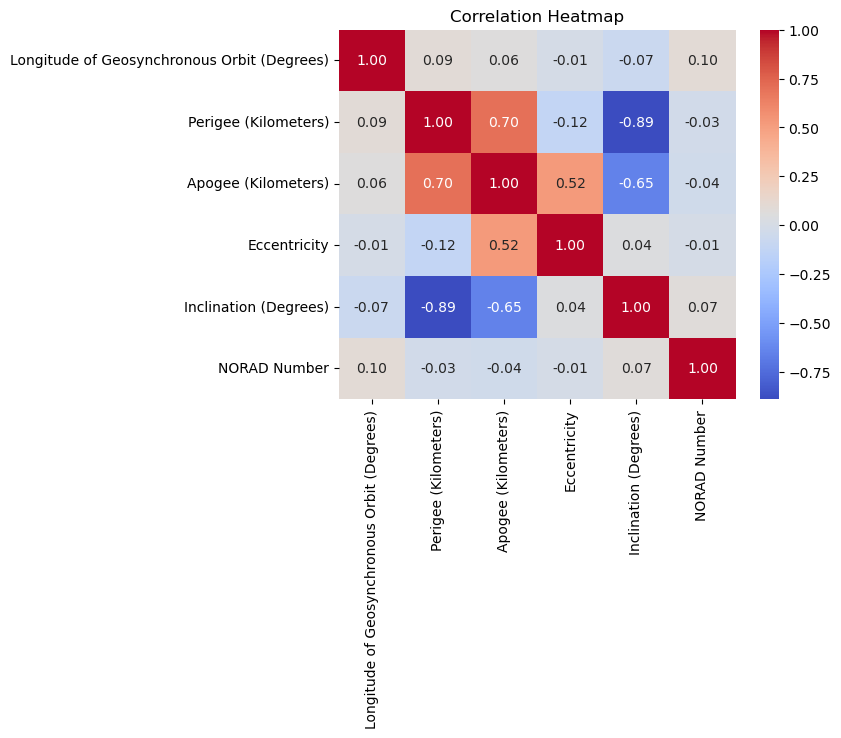

In [44]:
sns.heatmap(sat_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Dummy variable

In [45]:
data = pd.get_dummies(sat_df, columns=["Country/Organization of UN Registry"], drop_first=True)

In [46]:
data

,Official Name of Satellite,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),Perigee (Kilometers),...,Country/Organization of UN Registry_South Korea,Country/Organization of UN Registry_Spain,Country/Organization of UN Registry_Sweden,Country/Organization of UN Registry_Thailand,Country/Organization of UN Registry_Turkey,Country/Organization of UN Registry_USA,Country/Organization of UN Registry_United Arab Emirates,Country/Organization of UN Registry_United Kingdom,Country/Organization of UN Registry_Venezuela,Country/Organization of UN Registry_Venezuela/China
1,ABS-2,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,35778.0,...,0,0,0,0,0,0,0,0,0,0
2,ABS-2A,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.00,35700.0,...,0,0,0,0,0,0,0,0,0,0
3,ABS-3,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,146.06,35769.0,...,0,0,0,0,0,0,0,0,0,0
4,ABS-3A,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-3.00,35788.0,...,0,0,0,0,0,0,0,0,0,0
5,ABS-4,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,35780.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Youthsat,Indian Space Research Organization (ISRO),India,Government,Space Science,NaN,LEO,Sun-Synchronous,0.00,802.0,...,0,0,0,0,0,0,0,0,0,0
1404,Ziyuan 2C,Chinese Academy of Space Technology,China,Military,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.00,555.0,...,0,0,0,0,0,0,0,0,0,0
1409,Zhongxing 10,China Satellite Communication Corp. (China Sat...,China,Government,Communications,NaN,GEO,NaN,110.50,35775.0,...,0,0,0,0,0,0,0,0,0,0
1418,Ziyuan 3,China Centre for Resources Satellite Data and ...,China,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.00,500.0,...,0,0,0,0,0,0,0,0,0,0


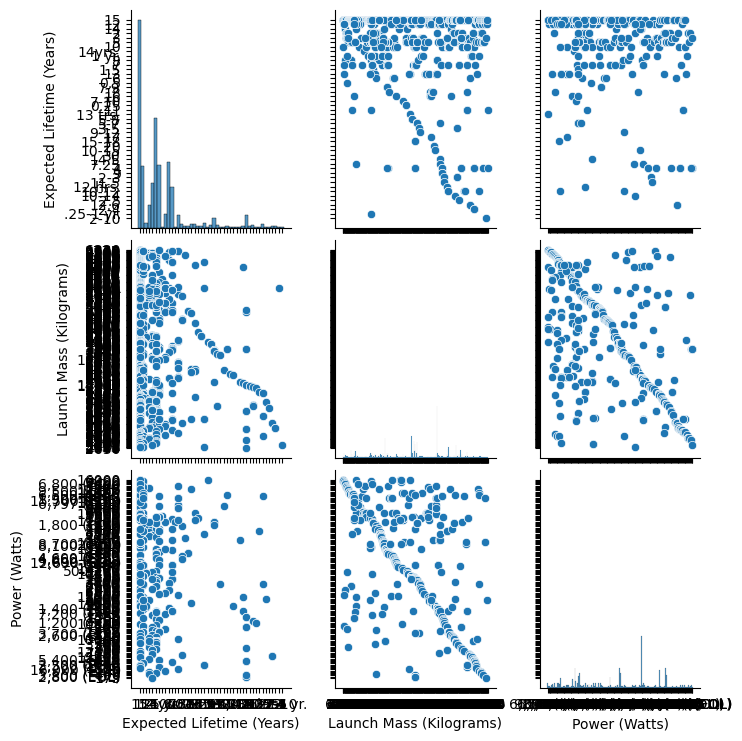

In [47]:
sns.pairplot(data, vars=["Expected Lifetime (Years)", "Launch Mass (Kilograms)", "Power (Watts)"])
plt.show()

In [48]:
target = data["Expected Lifetime (Years)"]
features = data.drop("Expected Lifetime (Years)", axis=1)

In [49]:
features = sm.add_constant(features)

In [50]:
print(features)

      const Official Name of Satellite  \
1       1.0                      ABS-2   
2       1.0                     ABS-2A   
3       1.0                      ABS-3   
4       1.0                     ABS-3A   
5       1.0                      ABS-4   
...     ...                        ...   
1401    1.0                   Youthsat   
1404    1.0                  Ziyuan 2C   
1409    1.0               Zhongxing 10   
1418    1.0                   Ziyuan 3   
1419    1.0                  Ziyan 3-2   

                                         Operator/Owner  \
1                         Asia Broadcast Satellite Ltd.   
2                         Asia Broadcast Satellite Ltd.   
3                         Asia Broadcast Satellite Ltd.   
4                         Asia Broadcast Satellite Ltd.   
5                         Asia Broadcast Satellite Ltd.   
...                                                 ...   
1401          Indian Space Research Organization (ISRO)   
1404                Chi

Cleaning expected lifetime

First getting rid of null values, then will need to get average of ranges, then will need to drop string values

In [67]:
subset_df = sat_df.dropna(subset=["Expected Lifetime (Years)"])


In [68]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 1 to 1419
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Official Name of Satellite                   976 non-null    object 
 1   Country/Organization of UN Registry          976 non-null    object 
 2   Operator/Owner                               976 non-null    object 
 3   Country of Operator/Owner                    976 non-null    object 
 4   Users                                        976 non-null    object 
 5   Purpose                                      976 non-null    object 
 6   Detailed Purpose                             182 non-null    object 
 7   Class of Orbit                               976 non-null    object 
 8   Type of Orbit                                528 non-null    object 
 9   Longitude of Geosynchronous Orbit (Degrees)  966 non-null    float64
 10  P

In [69]:
unique_values = subset_df["Expected Lifetime (Years)"].unique()
unique_values

array(['15', '12', '14', '2', '3', '5', '10', '14yrs.', '1 yr.', '8', '7',
       '1.5', '13', '6', '0.5', '7-9', '18', '16', '7-10', '0.25', '11',
       '13 trs,', '5-8', '5-7', '3-5', '9-12', '17', '15-18', '20',
       '10-15', '30', '14.5', '7.25', '4', '9', '2-3', '11.5', '12 hrs.',
       '10-12', '10-14', '2.5', '12.6', '2-4', '.25-1 yr.', '2-10'],
      dtype=object)

Function to convert range to mean

In [54]:
def convert_range_to_mean(value):
  if '-' in value:
    low, high = value.split('-')
    return (float(low) + float(high)) / 2
  return float(value)

Function to get rid of strings

In [55]:
def remove_extra_letters(value):
  return value.replace(' yr.', '').replace(' hrs.', '').replace(' trs', '').replace('yrs.', '').replace(',', '')

In [56]:
subset_df['Expected Lifetime (Years)'] = subset_df['Expected Lifetime (Years)'].apply(remove_extra_letters)

In [57]:
subset_df["Expected Lifetime (Years)"].unique()

array(['15', '12', '14', '2', '3', '5', '10', '1', '8', '7', '1.5', '13',
       '6', '0.5', '7-9', '18', '16', '7-10', '0.25', '11', '5-8', '5-7',
       '3-5', '9-12', '17', '15-18', '20', '10-15', '30', '14.5', '7.25',
       '4', '9', '2-3', '11.5', '10-12', '10-14', '2.5', '12.6', '2-4',
       '.25-1', '2-10'], dtype=object)

In [58]:
subset_df['Expected Lifetime (Years)'] = subset_df['Expected Lifetime (Years)'].apply(convert_range_to_mean)

In [64]:
subset_df["Expected Lifetime (Years)"].unique()

array([15.   , 12.   , 14.   ,  2.   ,  3.   ,  5.   , 10.   ,  1.   ,
        8.   ,  7.   ,  1.5  , 13.   ,  6.   ,  0.5  , 18.   , 16.   ,
        8.5  ,  0.25 , 11.   ,  6.5  ,  4.   , 10.5  , 17.   , 16.5  ,
       20.   , 12.5  , 30.   , 14.5  ,  7.25 ,  9.   ,  2.5  , 11.5  ,
       12.6  ,  0.625])

In [70]:
subset_df

,Official Name of Satellite,Country/Organization of UN Registry,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),...,Dry Mass (Kilograms),Power (Watts),Date of Launch,Expected Lifetime (Years),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
1,ABS-2,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,NaN,16000,2/6/2014,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0
2,ABS-2A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.00,...,NaN,NaN,6/15/2016,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0
3,ABS-3,Philippines,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,146.06,...,1800,9000,8/19/1997,15,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901.0
4,ABS-3A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,NaN,3/2/2015,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424.0
5,ABS-4,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,1700,7400,3/13/2004,12,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Youthsat,India,Indian Space Research Organization (ISRO),India,Government,Space Science,NaN,LEO,Sun-Synchronous,0.00,...,NaN,NaN,4/20/2011,2,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Center,PSLV C16,2011-015B,37388.0
1404,Ziyuan 2C,China,Chinese Academy of Space Technology,China,Military,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.00,...,NaN,NaN,11/4/2004,3-5,Chinese Academy of Space Technology (CAST),China,Taiyuan Launch Center,Chang Zheng 4B,2004-044A,28470.0
1409,Zhongxing 10,China,China Satellite Communication Corp. (China Sat...,China,Government,Communications,NaN,GEO,NaN,110.50,...,NaN,NaN,6/20/2011,15,Chinese Academy of Space Technology (CAST),China,Xichang Satellite Launch Center,Long March 3B,2011-026A,37677.0
1418,Ziyuan 3,China,China Centre for Resources Satellite Data and ...,China,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.00,...,NaN,NaN,1/9/2012,4,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2012-001A,38046.0
